Please do one of the following.


# Part I: Classification

In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [715]:
df = pd.read_csv("Default.csv")

In [716]:
df = df.set_index("Unnamed: 0")

In [717]:
df.index.names = ['index']
df.head()

,default,student,balance,income
index,,,,
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [718]:
df.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

2) Convert `default` and `student` to categorical variables.

In [719]:
df = df.replace("No",0).replace("Yes",1)
df.head()

,default,student,balance,income
index,,,,
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

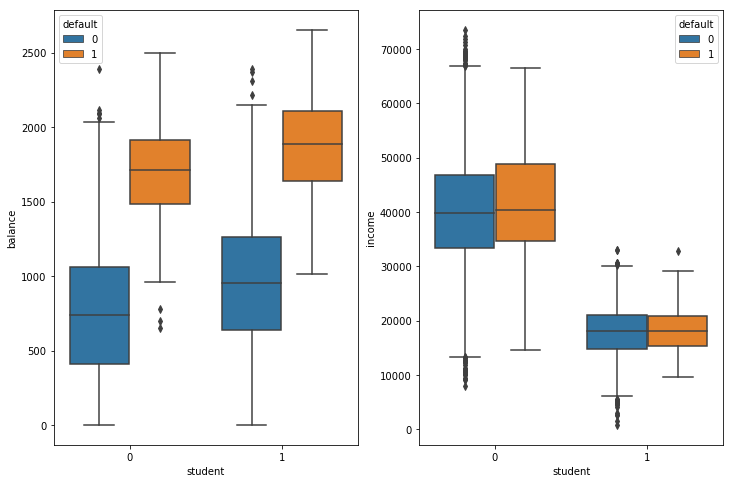

In [720]:
fig, ax = plt.subplots(figsize = (12, 8), ncols = 2)
sns.boxplot(x = 'student', y = 'balance', hue = 'default', data = df, ax = ax[0])
sns.boxplot(x = 'student', y = 'income', hue = 'default', data = df, ax = ax[1])
plt.show()

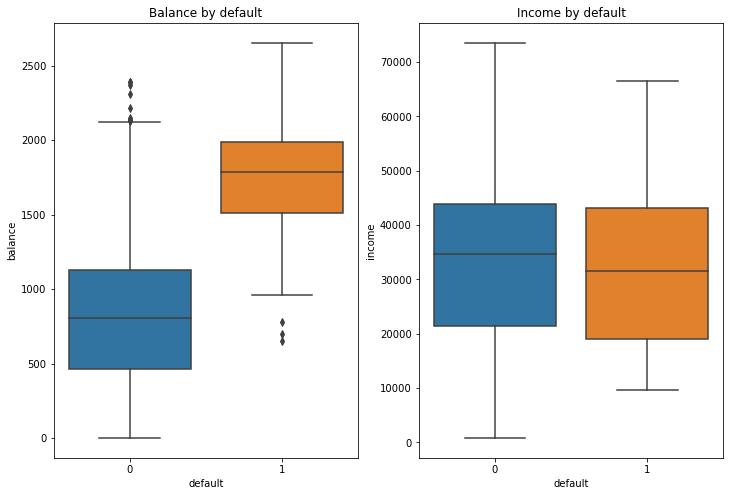

In [721]:
fig, ax = plt.subplots(figsize = (12,8), ncols = 2)
sns.boxplot(x = 'default', y = 'balance', data = df, ax = ax[0]).set_title("Balance by default")
sns.boxplot(x = 'default', y = 'income', data = df, ax = ax[1]).set_title("Income by default")
plt.show()

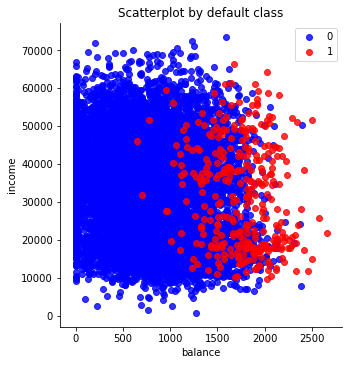

In [722]:
sns.lmplot(x = 'balance', y = 'income', data = df, hue = 'default', 
           fit_reg = False, legend = False, 
           palette = ['blue','red'])
plt.title("Scatterplot by default class")
plt.legend(loc = 'upper right')
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based solely
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [723]:
ind = df['student'] == 1
df_student = df[ind]

In [724]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [725]:
X = df_student[['balance', 'income']]
y = df_student['default']

In [726]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [727]:
lgr = LogisticRegression(penalty = "l1")

# Fit model using training
lgr_fit = lgr.fit(X_train, y_train)

# Make prediction on training/testing
train_pred = lgr.predict(X_train)
test_pred = lgr.predict(X_test)

# Check accuracy
print("The train error is {}".format(accuracy_score(y_train, train_pred)))
print("The test error is {}".format(accuracy_score(y_test, test_pred)))

The train error is 0.9660297239915074
The test error is 0.9643463497453311


##### Understand coefficient

   feature     coeff
0  balance  0.005117
1   income  0.000004


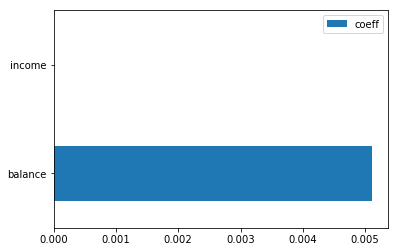

In [728]:
df_coeff = pd.DataFrame(list(zip(['balance', 'income'], lgr.coef_.flatten()))).sort_values(by = 1, ascending = False)
df_coeff.columns = ['feature', 'coeff']
print(df_coeff)

ax = df_coeff.plot.barh()
ax.set_yticklabels(df_coeff['feature'])
plt.show()

##### Confusion Matrix

In [729]:
# plot confusion matrix and ROC Curve
from sklearn.metrics import auc, confusion_matrix, classification_report, roc_curve

In [730]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    
    # Plot 
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[559   2]
 [ 19   9]]


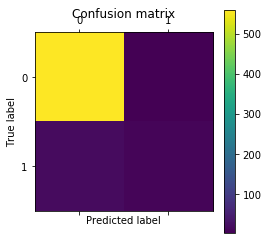

In [731]:
plot_confusion_matrix(y_test, test_pred)

##### AUC and ROC

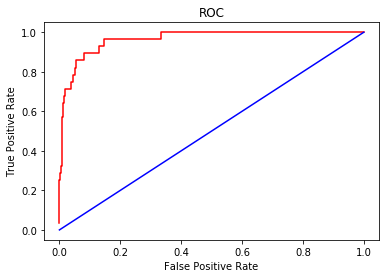

In [732]:
test_pred_prob = lgr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_pred_prob)

# plot TPR against FPR
plt.plot(fpr, tpr, color='red')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()

In [733]:
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(auc(fpr,tpr)))

Area Under Curve (AUC) of the Logistic Regression is: 0.9640310669722434


In [734]:
# Classification report
print(classification_report(y_train, train_pred))
print(classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2256
          1       0.74      0.29      0.42        99

avg / total       0.96      0.97      0.96      2355

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       561
          1       0.82      0.32      0.46        28

avg / total       0.96      0.96      0.96       589



##### Decision Boundary

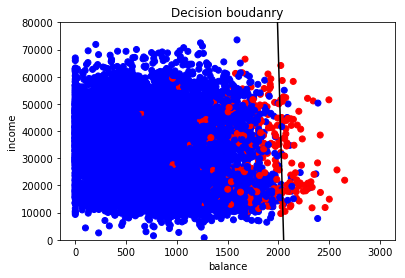

In [735]:
color = {1:"red", 0:"blue"}
plt.scatter(df['balance'], df['income'], c = df['default'].apply(lambda x:color[x]))
plt.title("Decision boudanry")
plt.xlabel("balance")
plt.ylabel("income")

#decision boundary 
intercept = lgr_fit.intercept_
coef = lgr_fit.coef_[0]

x = np.arange(0, 3000, 1)
y = (intercept + coef[0] * x) / -coef[1]
plt.plot(x, y, c='black')
plt.ylim(0, 80000)
plt.show()

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

In [736]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

X = df[['student','balance','income']]
y = df['default']

# standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [737]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [738]:
lgr = LogisticRegression(penalty = "l1")
# Fit model using training
lgr.fit(X_train, y_train)

alphas = np.logspace(-10,-2,100)
scores = []
for i in alphas:
    ridge = Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    scores.append(ridge.score(X_test, y_test))

max_index = scores.index(max(scores))

# Train with optimal alpha
ridge = Ridge(alpha = alphas[max_index])
ridge.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

   feature     coeff
1  balance  0.066665
2   income  0.003796
0  student -0.005456


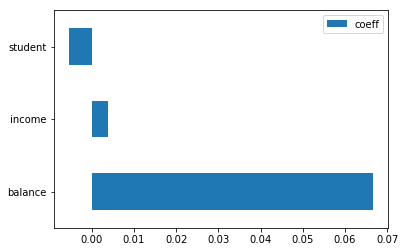

In [739]:
df_coeff = pd.DataFrame(list(zip(['student','balance', 'income'], ridge.coef_.flatten()))).sort_values(by = 1, ascending = False)
df_coeff.columns = ['feature', 'coeff']
print(df_coeff)

ax = df_coeff.plot.barh()
ax.set_yticklabels(df_coeff['feature'])
plt.show()

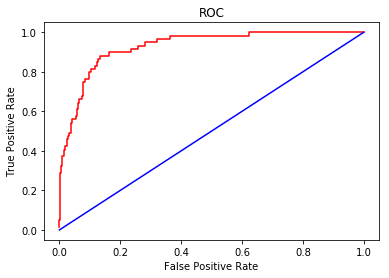

Area Under Curve (AUC) of the Logistic Regression is: 0.9282564465285237


In [740]:
lgr = LogisticRegression(penalty = "l1", C = alphas[max_index])
lgr.fit(X_train, y_train)

test_pred_prob = lgr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_pred_prob)

# plot TPR against FPR
plt.plot(fpr, tpr, color='red')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(auc(fpr,tpr)))

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

In [741]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lgr, X_train, y_train, cv = 10)
print(scores)

[0.96754057 0.9650437  0.9650437  0.96754057 0.96625    0.9675
 0.9649562  0.96745932 0.96370463 0.96620776]


* The model looks robust which yeilds similar cross-validated results

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

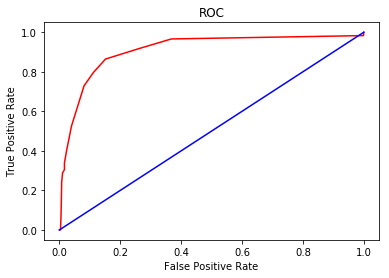

Area Under Curve (AUC) of the Logistic Regression is: 0.9097136719670973


In [742]:
from sklearn.tree import DecisionTreeClassifier

X = df[['student', 'balance', 'income']]
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)

test_pred_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_pred_prob)

# plot TPR against FPR
plt.plot(fpr, tpr, color='red')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(auc(fpr,tpr)))

* The previous model works better

8) Find the optimal decision tree depth and compute the AUC ROC. 

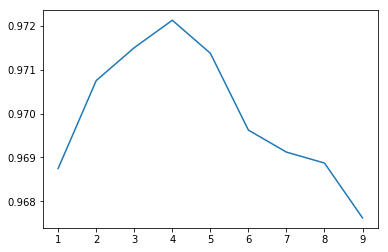

Optimal Decision Tree depth is 3


In [743]:
depths = np.arange(1,10)
scores = []
for i in depths:
    dt = DecisionTreeClassifier(max_depth = i)
    scores.append(np.mean(cross_val_score(dt, X_train, y_train, cv = 10)))
plt.plot(depths, scores)
plt.show()
print("Optimal Decision Tree depth is {}".format(np.argmax(scores)))

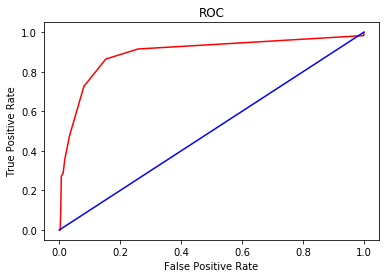

Area Under Curve (AUC) of the Logistic Regression is: 0.8941791318471172


In [744]:
# Train with optimal depth and compute AUC/ROC
dt = DecisionTreeClassifier(max_depth = depths[np.argmax(scores)])
dt.fit(X_train, y_train)

test_pred_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_pred_prob)

# plot TPR against FPR
plt.plot(fpr, tpr, color='red')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(auc(fpr,tpr)))

# Part II: Recommendation Systems. 

In this problem we will use the notebook https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/matrix_factorization_recommender.ipynb  as
a starting point.

1) Split the ratings matrix `R_df` into training and testing sets. Remember we need to do this for rows and columns now. 

2) Evaluate the performance of the matrix factorization model for $K=50$. In particular, measure the:
 - Precision.
 - Recall. 

You can round up or down to the nearest integer for the ratings. 

3) Construct an item/item and user/user model, and evaluate the performance as in 2). How does it compare?

4) Check how your answer to 3) changes (if at all) as you try different values of K for K=10, 20, 100. 